In [27]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set()

In [12]:
features = ['O3','PM10','PM25','NO2','T2M']
train = pd.read_csv('train.csv', parse_dates = ['date'])
train = train.dropna(axis = 0, how = 'any') 
X_train = train[features]
y = train['mortality_rate'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.1)

In [13]:
model = RandomForestRegressor(n_estimators = 200)
model.fit(X_train, y_train)

0.051031573316563383

In [15]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [16]:
data = pd.read_csv('train.csv', parse_dates=[2], index_col='Id') 

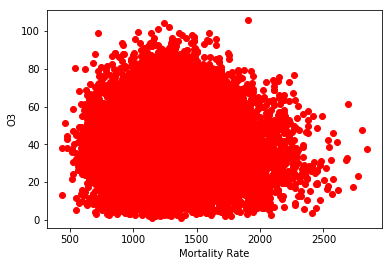

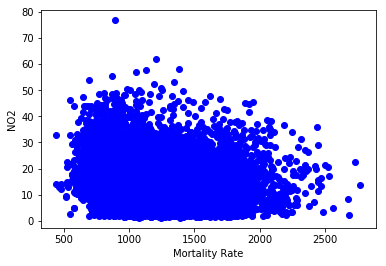

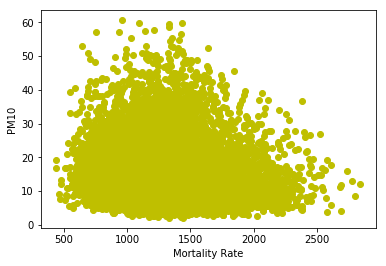

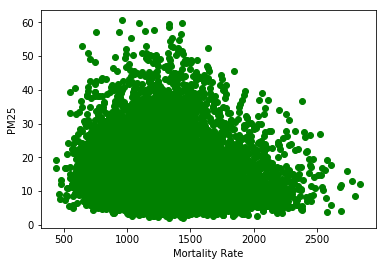

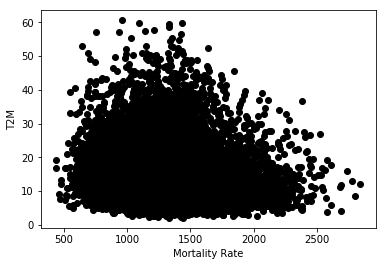

In [21]:
plt.plot(data['mortality_rate']*1000,data['O3'],'ro')
plt.xlabel('Mortality Rate')
plt.ylabel('O3')
plt.show()


plt.plot(data['mortality_rate']*1000,data['NO2'],'bo')
plt.xlabel('Mortality Rate')
plt.ylabel('NO2')
plt.show()

plt.plot(data['mortality_rate']*1000,data['PM10'],'yo')
plt.xlabel('Mortality Rate')
plt.ylabel('PM10')
plt.show()

plt.plot(data['mortality_rate']*1000,data['PM10'],'go')
plt.xlabel('Mortality Rate')
plt.ylabel('PM25')
plt.show()

plt.plot(data['mortality_rate']*1000,data['PM10'],'ko')
plt.xlabel('Mortality Rate')
plt.ylabel('T2M')
plt.show()

In [26]:
regions = dict((r['Code'],r['Region']) \
    for r in csv.DictReader(open('regions.csv')))
data['region'].replace(regions, inplace = True)

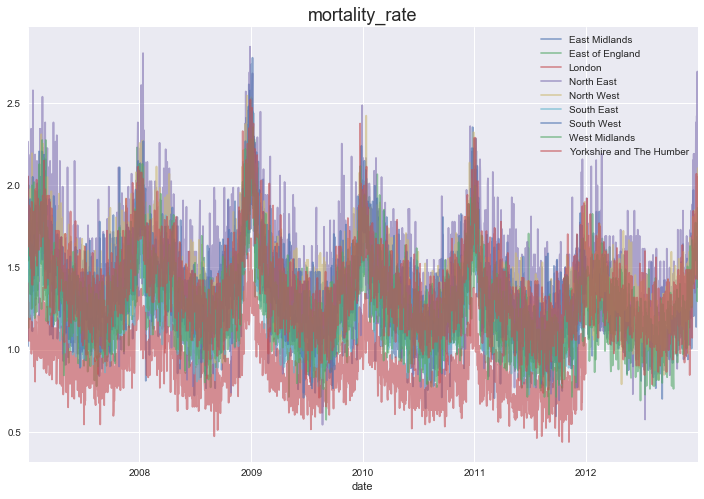

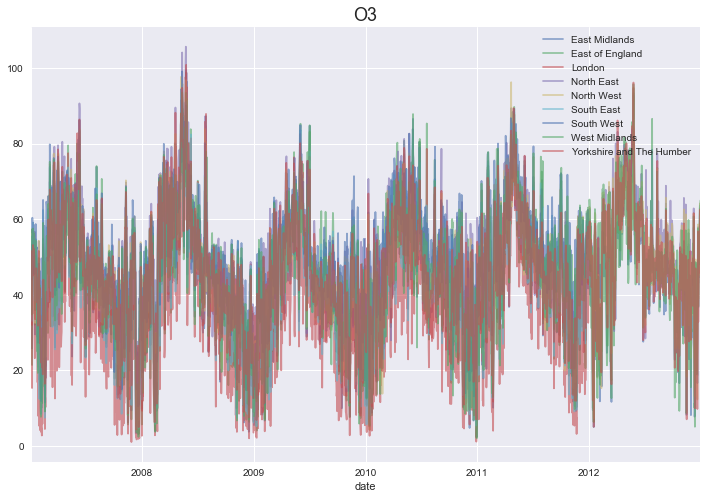

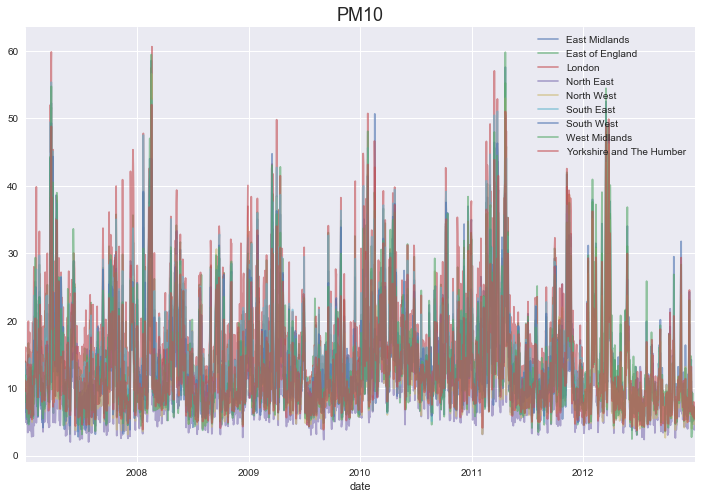

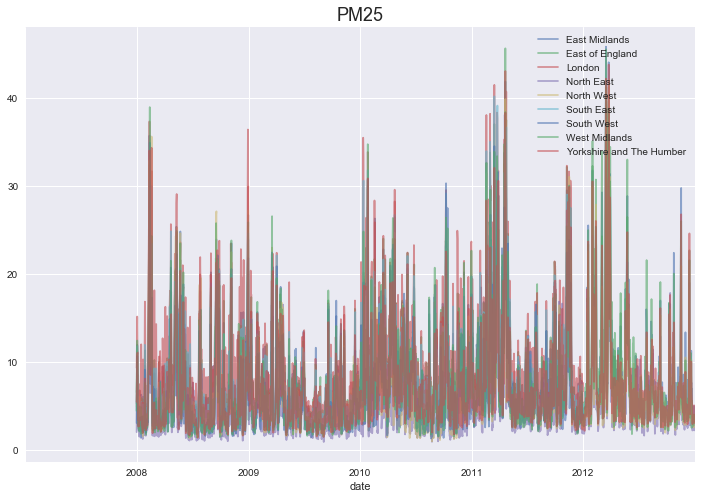

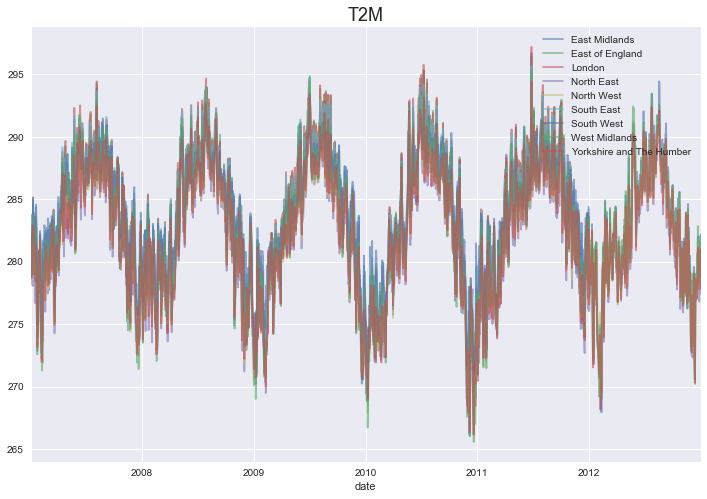

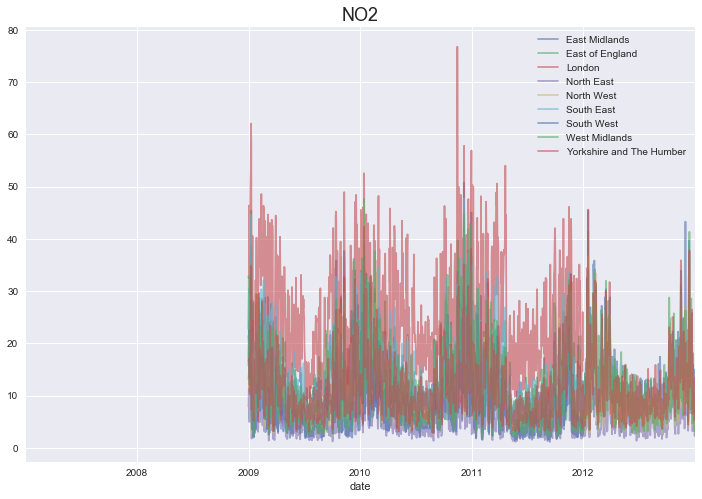

In [28]:
def plotbyregion(var):
    byregion = data[['date', 'region', var]] 
    byregion = byregion.pivot(index='date', columns='region', values=var) 
    byregion.plot(figsize=(12,8), alpha=0.6)
    plt.title(var, fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

plotbyregion('mortality_rate')
plotbyregion('O3')
plotbyregion('PM10')
plotbyregion('PM25')
plotbyregion('T2M')
plotbyregion('NO2')